# Import Library

In [31]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so
from matplotlib.ticker import FuncFormatter

# Dataframe Library
import pandas as pd

# Database Library
import duckdb

# Database Connection

Our database materilized in "database" directory and for this visualization task, we need to get both table that we already put into the databse

In [ ]:
# Database Connection

conn = duckdb.connect(database="database/verihubs.duckdb", read_only=True)

# Print List of Tables in the Database
conn.execute("SHOW TABLES").df()

,name
0,daily_order_status
1,monthly_category_sales
2,raw_amazon_data


# Visualization

***Disclosure***

1. Since the task only required to create visualization, i passed ***Data Cleaning*** part for this. But, in ***TL:DR*** i will do it to summarize additional insight!
2. All of the task visualization will use ***Matplotlib***

## Visualization #1

The first task required us to create visualization about Daily order by Status

In [42]:
# table read and convert into dataframe
df_daily_order = conn.execute("SELECT * FROM daily_order_status").df() # table that we use is daily_order_status

df_daily_order.head() # show the top 5 rows of the dataframe just for an overview of the data

,day,Status,order_count
0,2022-03-31,Cancelled,18
1,2022-03-31,Shipped,123
2,2022-03-31,Shipped - Delivered to Buyer,16
3,2022-03-31,Shipped - Returned to Seller,1
4,2022-04-01,Cancelled,221


For this first visualization, i want to use stacked-bar chart to visualize the data. Stacked-bar chart in matplotlib required us to create it from pivot-table so the first step here is to change the format into pivot table

In [ ]:
df_daily_pivot = df_daily_order.pivot_table(index='day', columns='Status', values='order_count') # pivot the dataframe to match matplotlib requirement

df_daily_pivot.head()

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
day,,,,,,,,,,,,,
2022-03-31,18.0,NaN,NaN,123.0,NaN,16.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2022-04-01,221.0,NaN,NaN,893.0,NaN,228.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN
2022-04-02,239.0,NaN,NaN,967.0,NaN,235.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN
2022-04-03,225.0,NaN,NaN,1025.0,NaN,294.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN
2022-04-04,182.0,1.0,NaN,899.0,NaN,279.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN


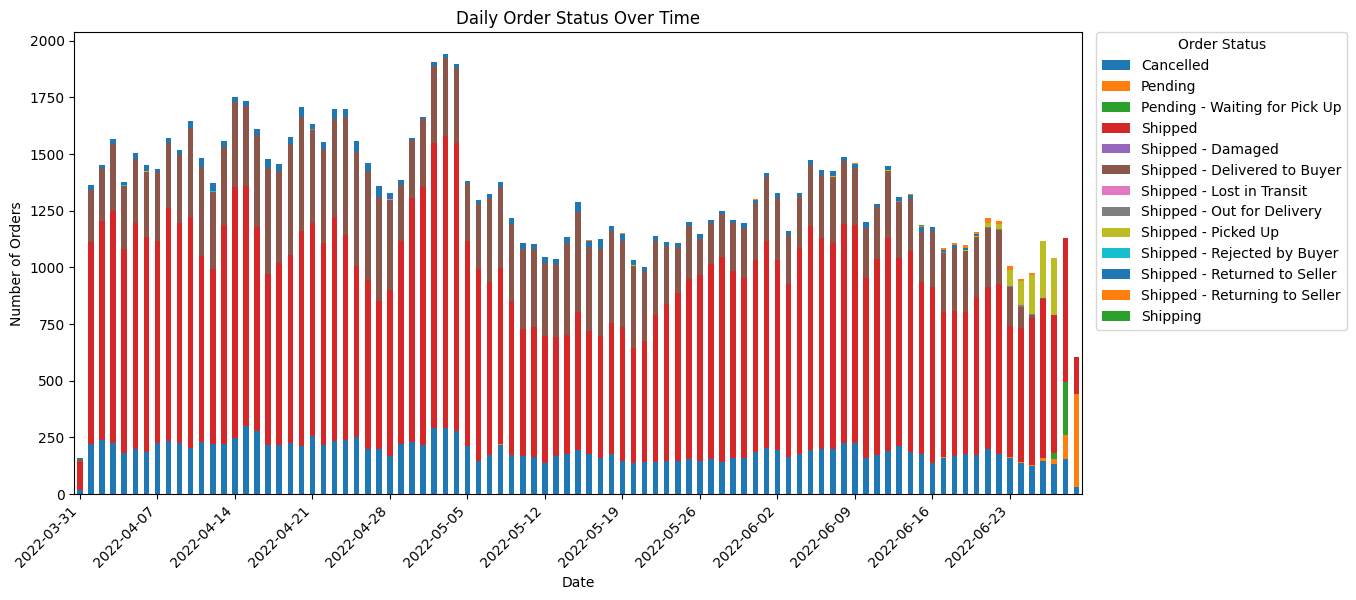

In [68]:
# Visualization: Stacked Bar Chart of Daily Order by Status

fig1, ax1 = plt.subplots(figsize=(13, 6)) # create a figure size and axis variable

df_daily_pivot.plot(kind='bar', stacked=True, ax=ax1) # create the stacked bar chart

ax1.set_xticks(range(0, len(df_daily_pivot.index), 7)) # set x-ticks to show every 7 days
ax1.set_xticklabels(df_daily_pivot.index.strftime('%Y-%m-%d')[::7], rotation=45, ha='right') # format x ticks labels to show date properly, skip to show every 7 days, and make sure the labels aligned with the tick
ax1.set_xlabel("Date") # set x-axis label

ax1.set_ylabel("Number of Orders") # set y-axis label

ax1.legend(bbox_to_anchor=(1.27, 1.015), loc='upper right', title='Order Status') # set the legend outside the plot
ax1.set_title('Daily Order Status Over Time') # set the title of the plot

plt.show() # show the plot

## Visualization #2

i still use stacked-bar chart for the 2nd visualization task, to see the breakdown of category

In [56]:
# Load Monthly Category Sales Data
df_monthly_sales = conn.execute("SELECT * FROM monthly_category_sales").df()

with the same 1st visualization's reason, we required to pivot the data

In [ ]:
df_sales_pivot = df_monthly_sales.pivot_table(index=pd.Grouper(key='month', freq="ME"), columns="Category", values="total_amount") # pivot the dataframe to match matplotlib requirement

df_sales_pivot

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
month,,,,,,,,,
2022-03-31,280.00,NaN,NaN,1099.00,NaN,53884.00,4511.00,7653.28,34256.57
2022-04-30,195583.21,63308.45,NaN,250666.65,55655.24,15506675.56,1821893.22,2927780.51,8017145.48
2022-05-31,159794.68,50866.57,NaN,293092.34,41536.62,12643698.35,1995607.16,4381304.41,6660576.62
2022-06-30,102750.29,36492.96,915.0,246359.67,26741.90,10999866.12,1525780.92,3899334.49,6587568.03


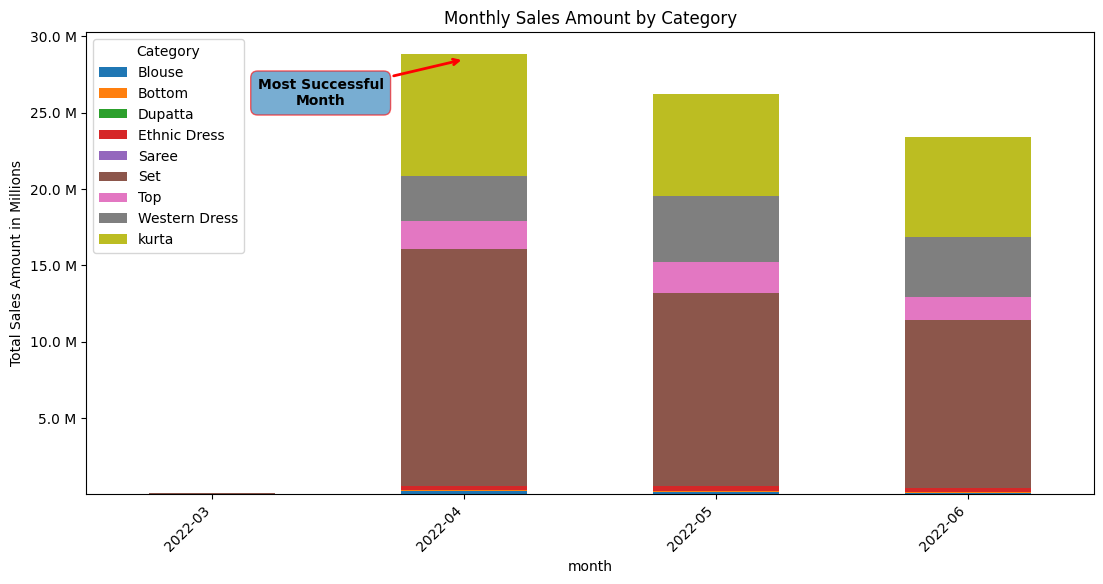

In [ ]:
# Visualization 2: Stacked Bar Chart of Daily Order by Status

fig2, ax2 = plt.subplots(figsize=(13, 6)) # create a figure size and axis variable

df_sales_pivot.plot(kind='bar', stacked=True, rot=45, ax=ax2) # create the stacked bar chart

ax2.set_xticklabels(df_sales_pivot.index.strftime('%Y-%m'), rotation=45, ha='right') # format x ticks labels to show date properly

# create a function to format y-axis labels into millions
def millions(x, pos):
    return f'{x * 1e-6:.1f} M'

ax2.yaxis.set_major_formatter(FuncFormatter(millions)) # apply the formatter to y-axis

# create annotation to highlight the most successful month
ax2.annotate('Most Successful\nMonth', 
            xy=(1, 28.5e6),  # point to the top of April bar
            xytext=(0.43, 25.5e6),  # position of text
            fontsize=10, # font size
            color='red', # font color
            fontweight='bold', # font weight
            ha='center', # alignment
            arrowprops=dict(arrowstyle='->', color='red', lw=2), # arrow formatting
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='red', alpha=0.6) # box formatting
            )

ax2.set_ylabel("Total Sales Amount in Millions") # name the y-axis
ax2.set_title("Monthly Sales Amount by Category") # set the title of the plot

plt.show() # show the plot

Based on total revenue we can easily tell April is the most profitable month in the dataset and the trend is declined from month to month until June.

# TL:DR